Importing the dependencies

In [7]:
!pip install seabornimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Processing

In [8]:
# loading the data from the csv file to pandas
car_dataset = pd.read_csv('CarPrice_Assignment.csv')

In [9]:
# inspecting the first 5 rows of our dataset
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# checking the number of rows and columns
car_dataset.shape

(205, 26)

In [11]:
# getting further information about the given data
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
# checking the number of missing values
car_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
# checking the categorical data in the distribution
print(car_dataset.fueltype.value_counts())
print(car_dataset.aspiration.value_counts())
print(car_dataset.doornumber.value_counts())
print(car_dataset.carbody.value_counts())
print(car_dataset.drivewheel.value_counts())
print(car_dataset.enginelocation.value_counts())
print(car_dataset.enginetype.value_counts())
print(car_dataset.cylindernumber.value_counts())
print(car_dataset.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


Encoding the categorical data with numbers

In [14]:
# encoding 'fueltype' column
car_dataset.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)

# encoding 'aspiration' column
car_dataset.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)

# encoding 'doornumber' column
car_dataset.replace({'doornumber':{'four':0,'two':1}},inplace=True)

# encoding 'carbody' column
car_dataset.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)

# encoding 'drivewheel' column
car_dataset.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)

# encoding 'enginelocation' column
car_dataset.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)

# encoding 'enginetype' column
car_dataset.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'l':3,'dohc':4,'rotor':5,'dohcv':6}},inplace=True)

# encoding 'cylindernumber' column
car_dataset.replace({'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}},inplace=True)

# encoding 'fuelsystem' column
car_dataset.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)




In [15]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,168.8,64.1,48.8,2548,4,0,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,168.8,64.1,48.8,2548,4,0,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,171.2,65.5,52.4,2823,2,1,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,0,0,0,0,99.8,176.6,66.2,54.3,2337,0,0,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,0,0,2,0,99.4,176.6,66.4,54.3,2824,0,2,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


Spiltting the dependant and independant variables

In [16]:
X = car_dataset[['symboling','fueltype','horsepower','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','boreratio','stroke','compressionratio','peakrpm','citympg','highwaympg', 'fuelsystem']]
Y = car_dataset['price']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   horsepower        205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

In [18]:
X['fuelsystem'].value_counts()

0    94
1    66
2    20
3    11
4     9
5     3
7     1
6     1
Name: fuelsystem, dtype: int64

In [19]:
print(X)

     symboling  fueltype  horsepower  ...  citympg  highwaympg  fuelsystem
0            3         0         111  ...       21          27           0
1            3         0         111  ...       21          27           0
2            1         0         154  ...       19          26           0
3            2         0         102  ...       24          30           0
4            2         0         115  ...       18          22           0
..         ...       ...         ...  ...      ...         ...         ...
200         -1         0         114  ...       23          28           0
201         -1         0         160  ...       19          25           0
202         -1         0         134  ...       18          23           0
203         -1         1         106  ...       26          27           2
204         -1         0         114  ...       19          25           0

[205 rows x 23 columns]


In [20]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


splitting data into training and test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2 )

In [22]:
X_train.dtypes

symboling             int64
fueltype              int64
horsepower            int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
peakrpm               int64
citympg               int64
highwaympg            int64
fuelsystem            int64
dtype: object

Model Training - Linear Regression

In [23]:
# loading the linear regression model which was imported from sklearn
lin_reg_model = LinearRegression()

In [24]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [25]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [26]:
# using r squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.8911949820607058


Visualizing the actual vs predicted prices

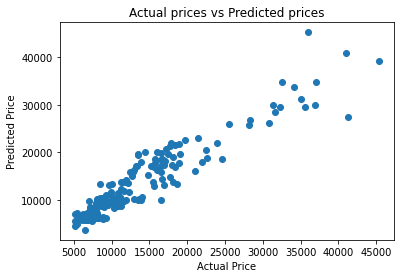

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [28]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [29]:
# using r squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error : ', error_score)

R squared error :  0.8915842008453347


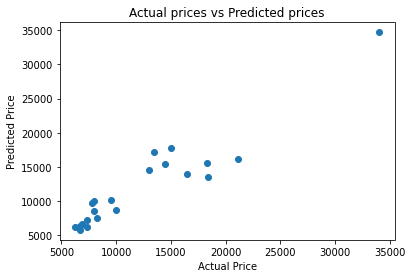

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices")
plt.show()